# Sales on Day of the Week

### Allison & Caitlin, Fall 2021

In [251]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [252]:
# Dataframe
df = pd.read_csv('../Data/clean_entire.csv')
df.head()
#print(df.columns)
#print(df.dtypes)

,Date,Item,Total Price,Category,Clothing,Suggested Price
0,9/24/21,jeans,$5.00,pants,1,5.0
1,9/24/21,boutique item,$6.00,boutique_item,1,NaN
2,9/24/21,boutique item,$7.00,boutique_item,1,NaN
3,9/24/21,button-down work shirt,$5.00,long_sleeves_blouses,1,5.0
4,9/24/21,short_sleeve_tops,$3.00,short_sleeve_tops,1,NaN


In [253]:
df.Date = pd.to_datetime(df.Date)
df['Day of Week'] = df.Date.dt.dayofweek # Series.dt() is accessor object for datetimelike props of Series values
df.head()

,Date,Item,Total Price,Category,Clothing,Suggested Price,Day of Week
0,2021-09-24,jeans,$5.00,pants,1,5.0,4
1,2021-09-24,boutique item,$6.00,boutique_item,1,NaN,4
2,2021-09-24,boutique item,$7.00,boutique_item,1,NaN,4
3,2021-09-24,button-down work shirt,$5.00,long_sleeves_blouses,1,5.0,4
4,2021-09-24,short_sleeve_tops,$3.00,short_sleeve_tops,1,NaN,4


**Note:** Monday is 0 and Sunday is 6. Also note that Suggested Price NaN's correspond to boutique items or unspecified items that are just mapped to their parent category.

In [254]:
# Remove dollar sign from price and convert to numeric object
df['Total Price'] = df['Total Price'].str.replace('$', '').astype(float)
df.head()

<ipython-input-254-918b543cec22>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Total Price'] = df['Total Price'].str.replace('$', '').astype(float)


,Date,Item,Total Price,Category,Clothing,Suggested Price,Day of Week
0,2021-09-24,jeans,5.0,pants,1,5.0,4
1,2021-09-24,boutique item,6.0,boutique_item,1,NaN,4
2,2021-09-24,boutique item,7.0,boutique_item,1,NaN,4
3,2021-09-24,button-down work shirt,5.0,long_sleeves_blouses,1,5.0,4
4,2021-09-24,short_sleeve_tops,3.0,short_sleeve_tops,1,NaN,4


In [255]:
# Total sales over the quarter
print('We made ${:.2f} this quarter. Not bad!'.format(df['Total Price'].sum()))
print('Sales days:', sorted(df['Day of Week'].unique()))

We made $747.50 this quarter. Not bad!
Sales days: [0, 1, 2, 4]


**Note:** i.e., We only had sales on Mondays: 0, Tuesdays: 1, Wednesdays: 2, and Fridays: 4.

In [256]:
print(df['Date'].unique())

['2021-09-24T00:00:00.000000000' '2021-10-01T00:00:00.000000000'
 '2021-10-04T00:00:00.000000000' '2021-10-06T00:00:00.000000000'
 '2021-10-08T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-10-13T00:00:00.000000000' '2021-10-15T00:00:00.000000000'
 '2021-10-18T00:00:00.000000000' '2021-10-19T00:00:00.000000000'
 '2021-10-27T00:00:00.000000000']


So, we had sales on **3 Mondays** (10/4, 10/11, 10/18), **1 Tuesday** (10/19), **3 Wednesdays** (10/6, 10/13, 10/27), **4 Fridays** (9/24, 10/1, 10/8, 10/15).

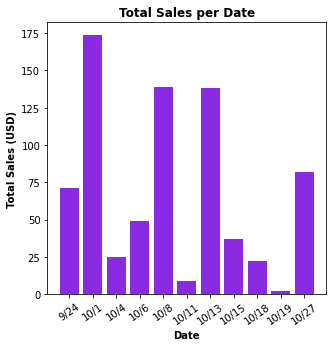

Total Sales on 9/24: $71.00
Total Sales on 10/1: $173.50
Total Sales on 10/4: $25.00
Total Sales on 10/6: $49.00
Total Sales on 10/8: $139.00
Total Sales on 10/11: $9.00
Total Sales on 10/13: $138.00
Total Sales on 10/15: $37.00
Total Sales on 10/18: $22.00
Total Sales on 10/19: $2.00
Total Sales on 10/27: $82.00


In [257]:
# Total sales for each day we held a sale
unique_dates = ['9/24', '10/1', '10/4', '10/6', '10/8', '10/11', '10/13', '10/15', '10/18', '10/19', '10/27']
unique_tots = []
for d in df['Date'].unique():
    unique_tots.append(df.loc[df['Date'] == d, 'Total Price'].sum())

plt.figure(figsize=(5,5))
plt.xticks(rotation = 35)
plt.xlabel('Date', fontweight = 'bold')
plt.ylabel('Total Sales (USD)', fontweight = 'bold')
plt.title('Total Sales per Date', fontweight = 'bold')
plt.bar(unique_dates, unique_tots, color = 'blueviolet')
plt.show()

for i in range(len(unique_dates)):
    print('Total Sales on {}: ${:.2f}'.format(unique_dates[i], unique_tots[i]))

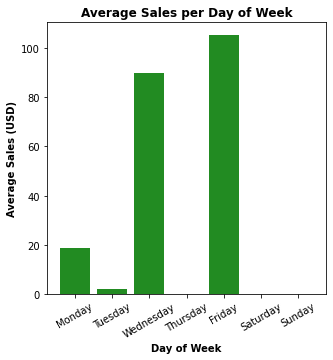

Monday average sales: $18.67
Tuesday average sales: $2.00
Wednesday average sales: $89.67
Thursday average sales: $0.00
Friday average sales: $105.12
Saturday average sales: $0.00
Sunday average sales: $0.00


In [258]:
# Average sales per day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tots_of_week = []
for d in range(0,7):
    tots_of_week.append(df.loc[df['Day of Week'] == d, 'Total Price'].sum())
counts_of_wk = [3, 1, 3, 1, 4, 1, 1]
avgs_of_week = [i / j for i, j in zip(tots_of_week, counts_of_wk)]

plt.figure(figsize=(5,5))
plt.xticks(rotation = 30)
plt.xlabel('Day of Week', fontweight = 'bold')
plt.ylabel('Average Sales (USD)', fontweight = 'bold')
plt.title('Average Sales per Day of Week', fontweight = 'bold')
plt.bar(days_of_week, avgs_of_week, color = 'forestgreen')
plt.show()

for i in range(len(days_of_week)):
    print('{} average sales: ${:.2f}'.format(days_of_week[i], avgs_of_week[i]))

**Note:** That one Tuesday 10/19 may have been a typo.

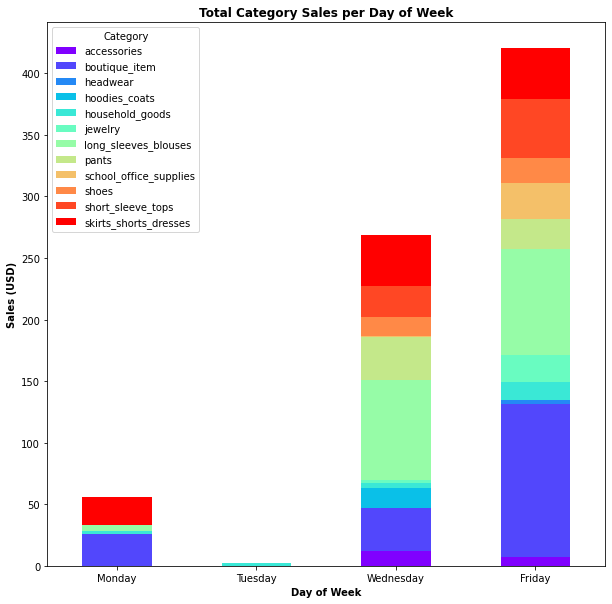

In [259]:
df['Day of Week'].replace(1,0)
df_grouped = df.groupby(['Day of Week', 'Category'])['Total Price'].sum().unstack().fillna(0)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Friday']

ax = df_grouped.plot(kind = 'bar', stacked = True, figsize=(10,10),cmap=plt.cm.rainbow)
plt.xticks(rotation=0)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Friday'])
plt.xlabel('Day of Week', fontweight = 'bold')
plt.ylabel('Sales (USD)', fontweight = 'bold')
plt.title('Total Category Sales per Day of Week', fontweight = 'bold')
plt.show()

In [261]:
df.replace({1:0})
df['Day of Week'].unique()

array([4, 0, 2, 1])